# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd 

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
pd.read_csv('lab12_files/US_Baby_Names_right.csv')

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

print(baby_names.dtypes)
print("\nLiczba rekordów: ", len(baby_names))

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object

Liczba rekordów:  1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [5]:
baby_names.drop(columns=['Unnamed: 0', 'Id'], inplace=True)
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [6]:
n_women = len(baby_names.loc[baby_names['Gender'] == 'F'])
n_men = len(baby_names.loc[baby_names['Gender'] == 'M'])
#n_men = len(baby_names) - n_women

if n_women != n_men:
    print(f"W zbiorze jest więcej imion {'kobiet' if n_women > n_men else 'mężczyzn'}.")
else:
    print("W zbiorze jest tyle samo imion kobiet co mężczyzn.")

W zbiorze jest więcej imion kobiet.


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [7]:
baby_names_grouped = baby_names.groupby('Name')
top_10_general = baby_names_grouped['Count'].sum().sort_values(ascending=False).head(10)
top_10_general

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [8]:
import matplotlib.pyplot as plt

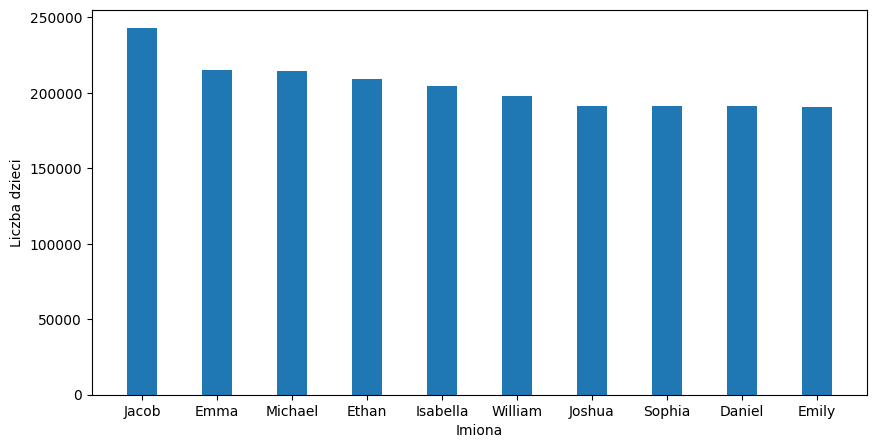

In [9]:
fig = plt.figure(figsize = (10, 5))

plt.bar(top_10_general.keys(), top_10_general.values, width = 0.4)
 
plt.xlabel("Imiona")
plt.ylabel("Liczba dzieci")
plt.show()

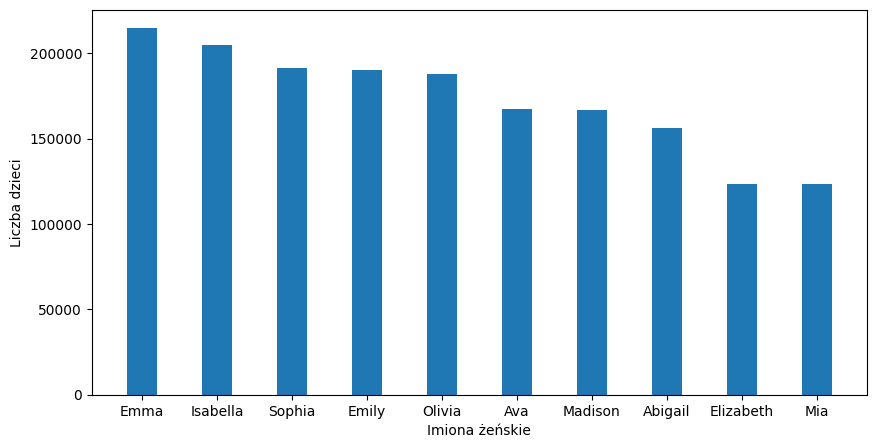

In [10]:
baby_names_grouped_gender = baby_names.groupby('Gender')
top_10_women = baby_names_grouped_gender.get_group('F').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)

fig = plt.figure(figsize = (10, 5))
plt.bar(top_10_women.keys(), top_10_women.values, width = 0.4)
 
plt.xlabel("Imiona żeńskie")
plt.ylabel("Liczba dzieci")
plt.show()

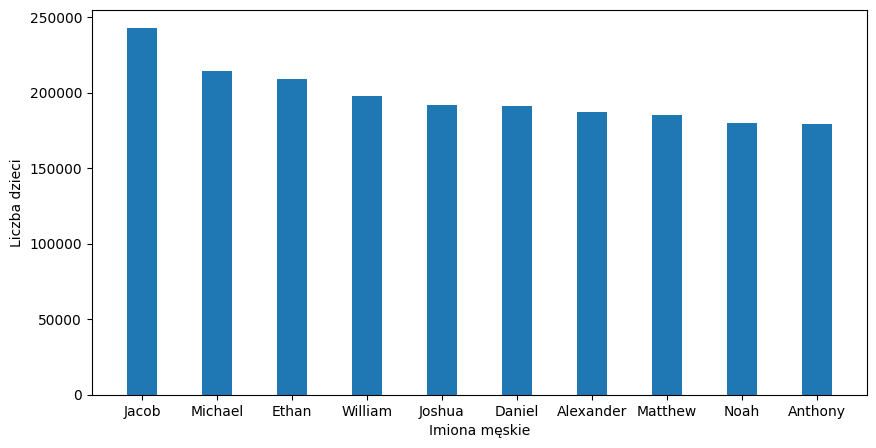

In [11]:
top_10_men = baby_names_grouped_gender.get_group('M').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)

fig = plt.figure(figsize = (10, 5))
plt.bar(top_10_men.keys(), top_10_men.values, width = 0.4)
 
plt.xlabel("Imiona męskie")
plt.ylabel("Liczba dzieci")
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [12]:
baby_names_grouped.ngroups

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [13]:
import numpy as np

def name_generator(gender):
    data = baby_names_grouped_gender.get_group(gender).groupby('Name')['Count'].sum()

    while(True):
        yield np.random.choice(data.keys(), p=(data.values/np.sum(data.values)))



In [14]:
female_gen = name_generator('F')

for idx, name in enumerate(female_gen):
    if idx > 5:
        break
    print(name)

Alexis
Julia
Rachel
Carly
Andrea
Isabella


In [15]:
male_gen = name_generator('M')

for idx, name in enumerate(male_gen):
    if idx > 5:
        break
    print(name)

Alexander
Jamel
Tucker
Mark
Ashton
James


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [16]:
print(f"Najczęściej występuje imię: {top_10_general.keys()[0]}")
baby_names_grouped['Count'].aggregate(['mean', 'median', 'std'])


Najczęściej występuje imię: Jacob


,mean,median,std
Name,,,
Aaban,6.000000,6.0,0.000000
Aadan,5.750000,5.5,0.957427
Aadarsh,5.000000,5.0,NaN
Aaden,17.479592,10.0,21.154974
Aadhav,6.000000,6.0,NaN
...,...,...,...
Zyra,6.000000,6.0,1.154701
Zyrah,5.500000,5.5,0.707107
Zyren,6.000000,6.0,NaN


## Część II

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Krok 1: Wczytaj dane

In [2]:
occupation_data = pd.read_csv('lab12_files/ocupation.csv', sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [3]:
occupation_data.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [4]:
occupation_data.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [5]:
print(f"Liczba obserwacji: {len(occupation_data)}")
print(f"Liczba kolumn: {len(occupation_data.columns)}")

Liczba obserwacji: 943
Liczba kolumn: 5


Krok 5: Wypisz nazwy kolumn

In [6]:
occupation_data.columns.values.tolist()

['user_id', 'age', 'gender', 'occupation', 'zip_code']

Krok 6: Ile różnych zawodów jest w zbiorze?

In [7]:
occupation_data.occupation.unique().size

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

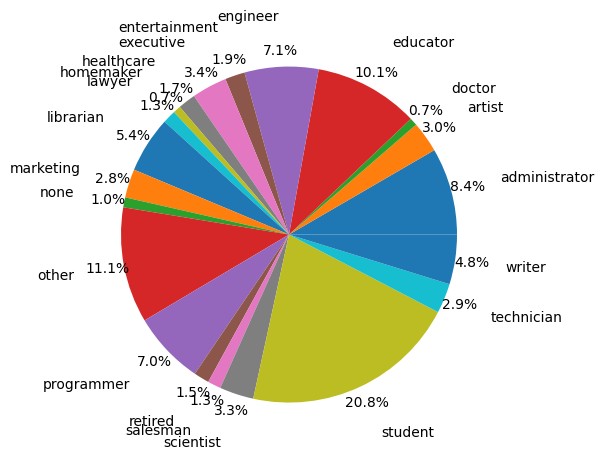

In [8]:
fig1, ax1 = plt.subplots()

occupation_details = occupation_data.groupby('occupation').size()

labels = occupation_details.keys()
sizes = occupation_details.values/sum(occupation_details.values)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.3, pctdistance=1.1)
ax1.axis('equal') 

plt.show()

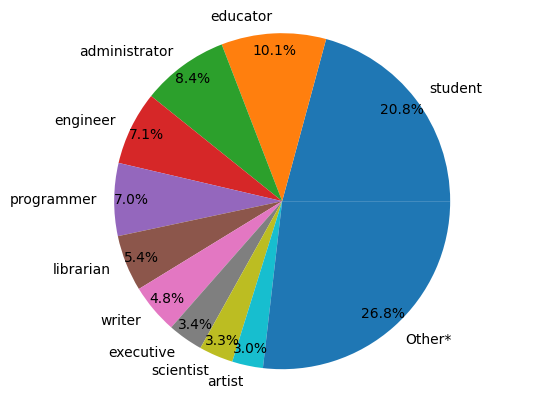

In [10]:
fig2, ax2 = plt.subplots()

occupation_details_2 = occupation_data[occupation_data.occupation != 'other'].groupby('occupation').size().sort_values(ascending=False)
occupation_details_2_top_10 = occupation_details_2.head(10)

labels = np.append(occupation_details_2_top_10.keys(), ['Other*'])   # Other*, aby odróżnić go od kategorii other z danych

sizes_top_10 = occupation_details_2_top_10.values
size_other = occupation_details['other'] + sum(occupation_details_2.tail(10).values)
sizes = np.append(sizes_top_10, [size_other]) / sum(occupation_details_2.values)

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.9)
ax2.axis('equal') 

plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

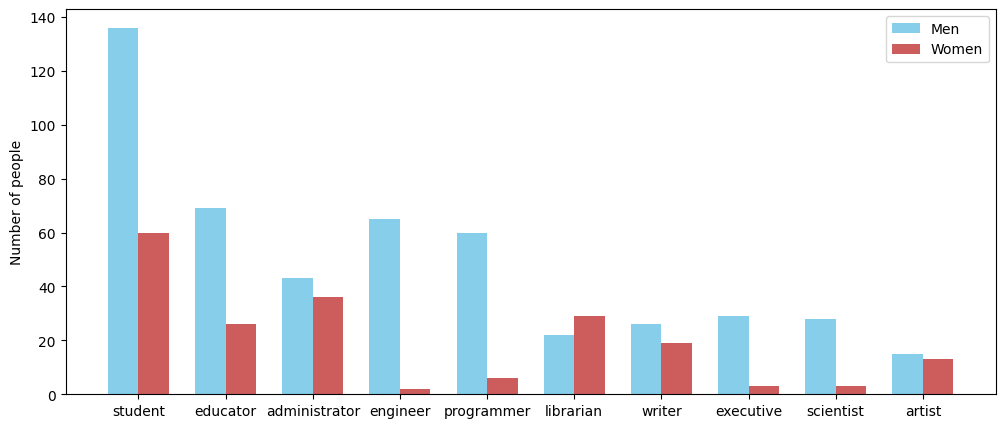

In [11]:
#zakładam, że "other" nie jest liczony jako zawód, więc go pomijam
top_10 = occupation_data[occupation_data.occupation != 'other'].groupby(['occupation', 'gender']).size()

men_numbers = [top_10.get((val, 'M'), default=0) for val in occupation_details_2_top_10.keys()]
women_numbers = [top_10.get((val, 'F'), default=0) for val in occupation_details_2_top_10.keys()]

ind = np.arange(len(men_numbers))  
width = 0.35 

fig, ax = plt.subplots(figsize = (12, 5))
rects1 = ax.bar(ind - width/2, men_numbers, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_numbers, width, color='IndianRed', label='Women')

ax.set_ylabel('Number of people')
ax.set_xticks(ind)
ax.set_xticklabels(occupation_details_2_top_10.keys())
ax.legend()

plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

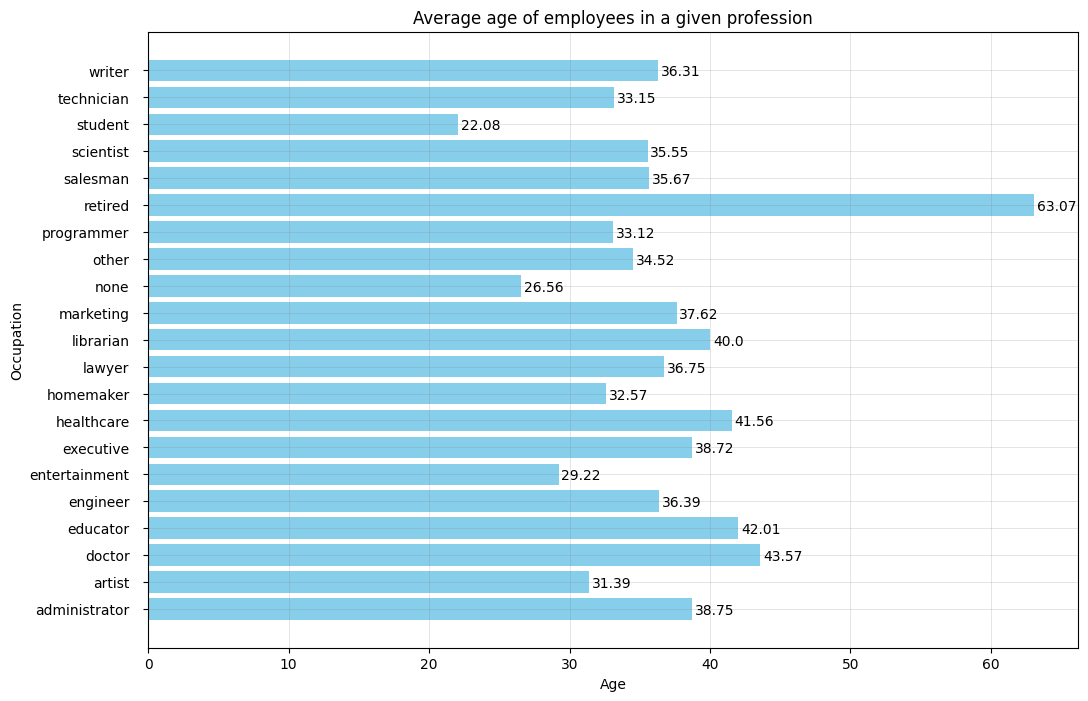

In [12]:
mean_age = occupation_data.groupby("occupation")["age"].mean()

fig, ax = plt.subplots(figsize=(12, 8))
 
ax.barh(mean_age.keys(), mean_age.values,  color='SkyBlue')

ax.yaxis.set_tick_params(pad = 10)
 
ax.grid( color ='grey', linewidth = 0.5, alpha = 0.3)
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             color ='black')
 
ax.set_title('Average age of employees in a given profession')
ax.set_xlabel('Age')
ax.set_ylabel('Occupation')
 
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

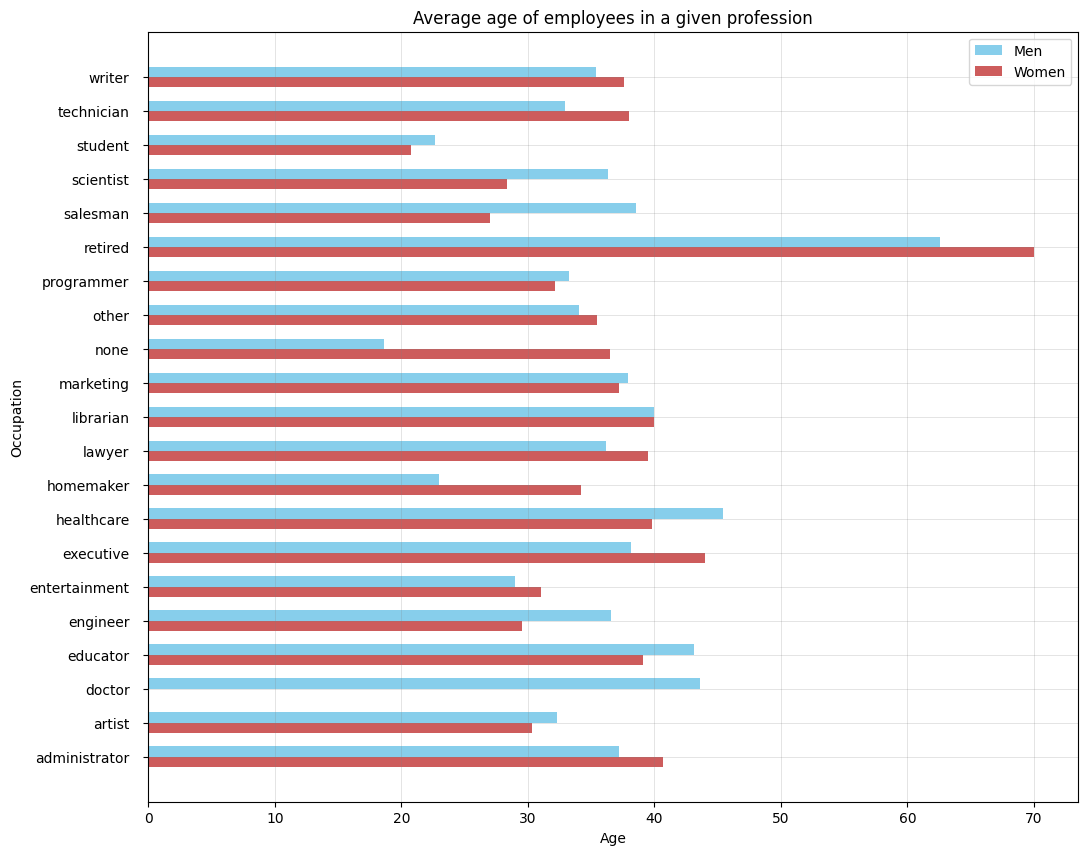

In [13]:
mean_age_groups = occupation_data.groupby(["occupation","gender"])["age"].mean()
occupations = mean_age_groups.index.get_level_values('occupation').unique().values

men_mean_age = [mean_age_groups.get((val, 'M'), default=0) for val in occupations]
women_mean_age = [mean_age_groups.get((val, 'F'), default=0) for val in occupations]

fig, ax = plt.subplots(figsize=(12, 10))
ind = np.arange(len(occupations))
width = 0.3
 
rects1 = ax.barh(ind + width/2, men_mean_age, width, color='SkyBlue', label='Men')
rects2 = ax.barh(ind - width/2, women_mean_age, width, color='IndianRed', label='Women')
 
ax.yaxis.set_tick_params(pad = 10)
 
ax.grid( color ='grey', linewidth = 0.5, alpha = 0.3)
 
ax.set_yticks(ind)
ax.set_yticklabels(occupations)

ax.set_title('Average age of employees in a given profession')
ax.set_xlabel('Age')
ax.set_ylabel('Occupation')
ax.legend()

plt.show()